In [252]:
# Import necessary libraries
!pip install sklearn-genetic
!pip install xgboost
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
pwd

'C:\\Users\\Maitrey'

In [214]:
df = pd.read_csv(r"C:\Users\Maitrey\Desktop\Data\creditcard.csv.zip")
print(f"Number of rows in the dataset ==>> {df.shape[0]}")
print(f"Number of columns in the dataset ==>> {df.shape[1]}")

Number of rows in the dataset ==>> 284807
Number of columns in the dataset ==>> 31


In [215]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [216]:
print("The name of the columns int the dataset are ")
df.columns

The name of the columns int the dataset are 


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [217]:
df.drop(["Time"],axis=1,inplace=True)

In [218]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [219]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [220]:
df_fraud=df[df['Class']==1]
df_true=df[df['Class']==0]
df_true=df_true.sample(frac=0.5)
data=pd.concat([df_true,df_fraud])
data = data.reset_index(drop=True)
data.shape

(142650, 30)

In [221]:
data["Amount"].describe()

count    142650.000000
mean         88.891394
std         255.658647
min           0.000000
25%           5.520000
50%          22.000000
75%          77.650000
max       25691.160000
Name: Amount, dtype: float64

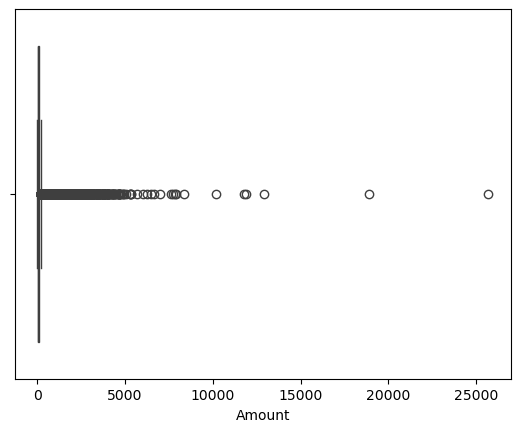

<Figure size 1600x1400 with 0 Axes>

In [222]:
# Create a box plot to visualize the distribution of 'SalePrice'
sns.boxplot(x=data['Amount'])
plt.figure(figsize=(16,14))
plt.show()

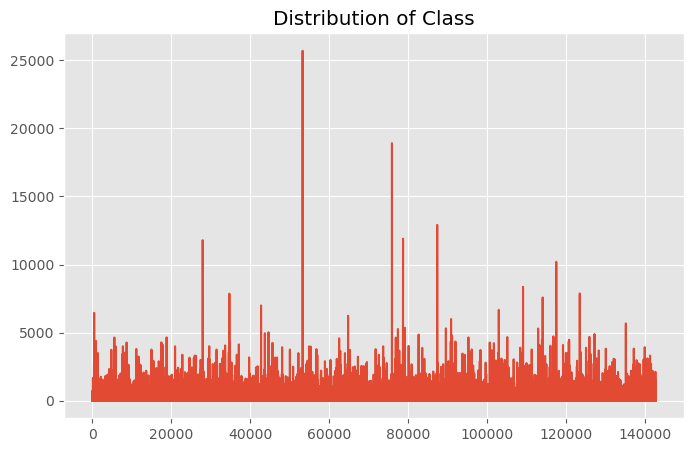

In [223]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distribution of Class")
    plt.plot(data["Amount"])
    plt.show()

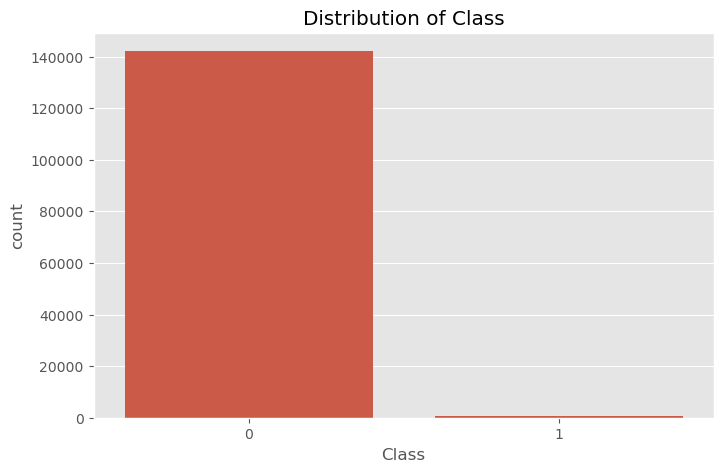

In [224]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,5))
    plt.title("Distribution of Class")
    sns.countplot(data=data,x=data["Class"])
    plt.show()

In [225]:
fraud_per=round((len(df[df['Class']==1])/len(df[df['Class']==0]))*100,2)
print(f"The percentage of fraud transaction is {fraud_per}%")

The percentage of fraud transaction is 0.17%


In [226]:
sc=StandardScaler()
data.Amount=sc.fit_transform(data.Amount.values.reshape(-1,1))

Index(['Amount', 'V7', 'V20', 'V6', 'V4', 'V21', 'V27', 'V18', 'V14', 'V24',
       'V13'],
      dtype='object')


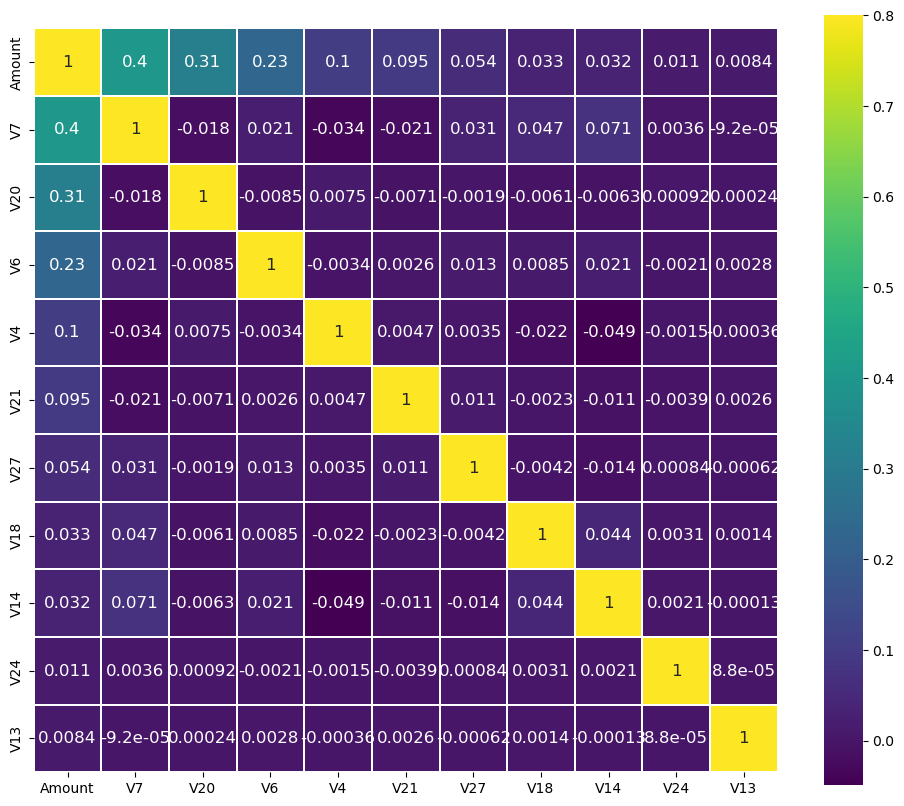

In [227]:
# Select the top k features most correlated with 'Amount' and visualize their correlation matrix
k=11
correlation = data.corr()
cols = correlation.nlargest(k,'Amount')['Amount'].index  # Get the names of the top k correlated features
print(cols)
# Calculate the correlation matrix for the selected features
cm=np.corrcoef(data[cols].values.T)
# Create a heatmap to visualize the correlation matrix
f , ax=plt.subplots(figsize = (12,10))
sns.heatmap(cm,vmax=0.8,linewidth=0.01,square=True,annot=True,cmap='viridis',linecolor='White'
            ,xticklabels = cols.values, annot_kws ={'size':12},yticklabels = cols.values)
plt.show()

In [230]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.247822,-0.249047,0.939359,-0.738313,-1.087792,-0.792728,-0.479384,-0.111305,1.613427,-1.120171,...,0.003476,0.326852,-0.052098,0.447122,0.546600,-0.691205,0.102626,0.038249,-0.343785,0
1,1.836332,-0.040659,-2.155869,1.218600,0.754379,-0.966214,0.945859,-0.472859,-0.181835,0.305698,...,0.187751,0.325189,-0.108795,0.669645,0.462621,-0.527354,-0.061464,-0.034575,0.182700,0
2,-0.742973,0.762017,1.315239,-0.385007,0.791451,-0.982776,0.949324,-0.190781,-0.661464,-0.768533,...,-0.263567,-0.809904,-0.264730,-0.008288,0.456471,0.404435,-0.037929,0.051503,-0.344216,0
3,0.798362,-0.708832,0.728288,1.604387,-1.090531,-0.228485,-0.177780,0.051087,1.063152,-0.279759,...,0.056175,-0.033345,-0.265382,0.383186,0.558338,-0.292113,0.013468,0.057576,0.431939,0
4,0.332867,-1.996836,0.323739,-1.284025,-0.898434,1.551726,-0.660321,0.627132,1.716746,-1.333501,...,0.499806,0.960860,-0.306082,-0.942100,-0.014977,0.188742,0.039769,0.060897,1.101506,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142645,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.177780,1
142646,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.344724,1
142647,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.043032,1
142648,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.610616,1


In [231]:
data.drop_duplicates(inplace=True)

In [259]:
x=data.drop(["Class"],axis=1)
y=data["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
print(f"Training set size: {X_train.shape[0]}samples")
print(f"Testing set size: {X_test.shape[0]}samples")

Training set size: 97689samples
Testing set size: 41867samples


In [271]:
# Logistic Regression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_pred_log=model_log.predict(x_test)
print(f"The accuracy of the model is {round(model_log.score(x_test,y_test)*100,2)}%")

The accuracy of the model is 99.86%


In [272]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_log),3)}")

F1-Score of the model is 0.747


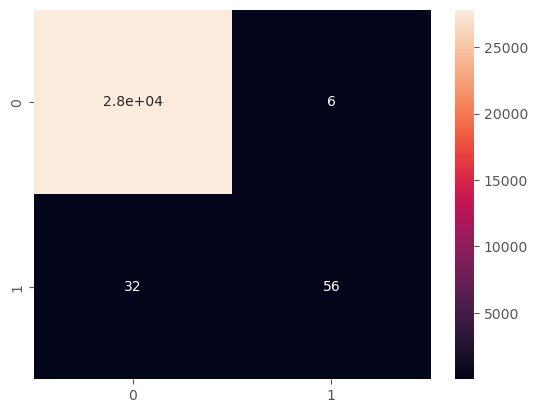

In [273]:
with plt.style.context(("ggplot")):
    sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True)
    plt.show()

In [267]:
# XGB Boost
model_xgb=XGBClassifier(max_depth=2)
model_xgb.fit(x_train,y_train)
y_pred_xgb_proba=model_xgb.predict_proba(x_test)[:,1]
y_pred_xgb=model_xgb.predict(x_test)
accuracy_xgb=model_xgb.score(x_test,y_test)
print(f"The Accuracy of the model is {round(accuracy_xgb*100,3)}")

The Accuracy of the model is 99.907


In [268]:
print(f"The accuracy of the model is {round(model_xgb.score(x_test,y_test)*100,3)}%")

The accuracy of the model is 99.907%


In [269]:
print(f"F1-Score of the model is {round(f1_score(y_test,y_pred_xgb),3)}")

F1-Score of the model is 0.838


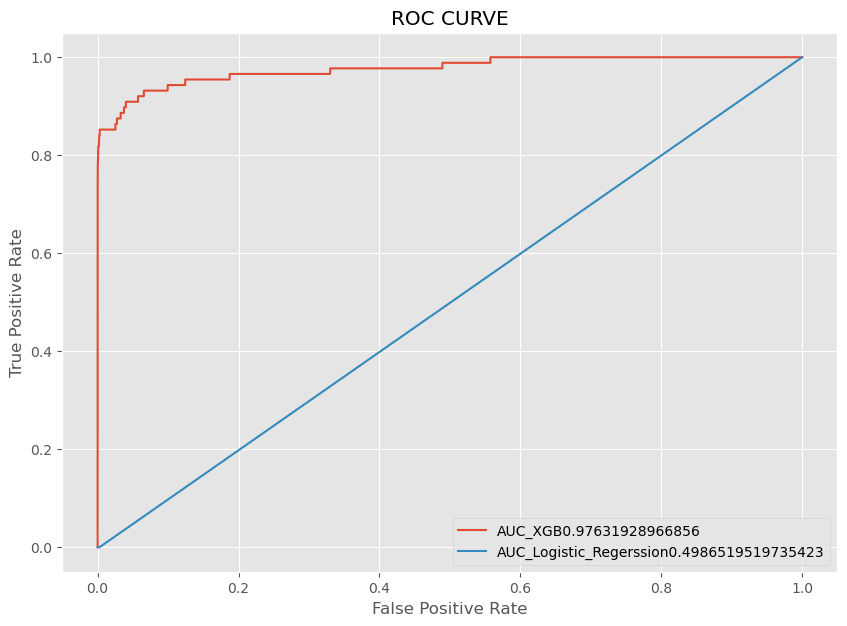

In [270]:
# XGB Bost Curve
fpr_xgb,tpr_xgb,_ = metrics.roc_curve(y_test,y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test,y_pred_xgb_proba)
# Logistic-regression Curve
fpr_log, tpr_log,_ = metrics.roc_curve(y_test,y_pred_log)
auc_log = metrics.roc_auc_score(y_test,y_pred_log)
with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    plt.title("ROC CURVE")
    plt.plot(fpr_xgb,tpr_xgb,label="AUC_XGB"+str(auc_xgb))
    plt.plot(fpr_log,tpr_log,label="AUC_Logistic_Regerssion"+str(auc_log))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()